<a href="https://colab.research.google.com/github/karrthikmohank/StatisticsPythonPrograms/blob/main/Week_1_Assignment__DescriptiveStatistics_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Assignment

# Use tips file from the available datasets, work only on the feature total_bill

# Visualize boxplot and histogram to comment on the distribution
# Comment on skewness and kurtosis
# Use both outlier detection methods (IQR Method & Z Method)
# Provide your analysis about the outliers obtained
# Did you observe any difference in the two methods of outliers?
# Find correlation of total_bill and size, comment on the correlation (bivariate analysis)


# Share your responses in the same file as comments (so that it is understandable)


    


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#Visualize boxplot and histogram to comment on the distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


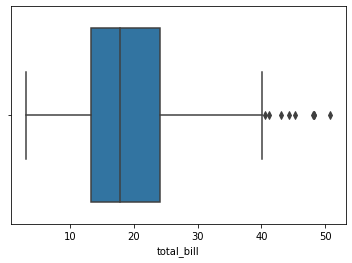

In [6]:
sns.boxplot(df.total_bill)

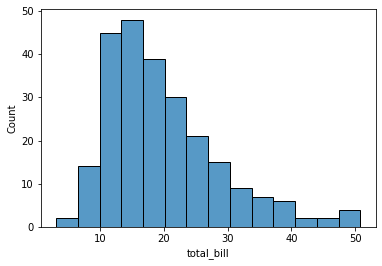

In [7]:
sns.histplot(df.total_bill)

# Comments about the distribution based on boxplot and histogram

*   The above figures suggest that the total bill data is right skewed. Only fewer people have high bills.
*   Boxplot clearly shows there are outliers
*   From the histogram it is clear that total bill data is right skewed.
*   Since the data is right skewed, mean is greater than median.







# Comment on skewness and kurtosis

In [8]:
from scipy.stats import skew, kurtosis
print(f"Kurtosis = {kurtosis(df.total_bill)}")
print(f"Skew = {skew(df.total_bill)}")

Kurtosis = 1.1691681323851366
Skew = 1.1262346334818638


*   Since the value of skew is greater than one, we have high level of positive skewness
*   Since the kurtosis value is less than three and excess kurtosis (kurtosis -3 < 0), we have distribution as platykurtic with tails are shorter and thinner and central peak lower and broader



# Use both outlier detection methods (IQR Method & Z Method)

# Outliers using IQR method

In [11]:
Q1,Q3 = np.percentile(df.total_bill,[25,75])
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")


Q1: 13.3475
Q3: 24.127499999999998


In [12]:
iqr = Q3 - Q1
lowerRange = Q1 - 1.5*iqr
upperRange = Q3 + 1.5*iqr
print(f"Lower Range: {lowerRange}")
print(f"Upper Range: {upperRange}")

Lower Range: -2.8224999999999945
Upper Range: 40.29749999999999


In [24]:
print(df.total_bill[(df.total_bill < lowerRange) | (df.total_bill > upperRange)])

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64


# Outliers using Z-Score Method

In [16]:
df['zScore'] = (df.total_bill - df.total_bill.mean())/df.total_bill.std()
print(df)

     total_bill   tip     sex smoker   day    time  size    zScore
0         16.99  1.01  Female     No   Sun  Dinner     2 -0.314066
1         10.34  1.66    Male     No   Sun  Dinner     3 -1.061054
2         21.01  3.50    Male     No   Sun  Dinner     3  0.137497
3         23.68  3.31    Male     No   Sun  Dinner     2  0.437416
4         24.59  3.61  Female     No   Sun  Dinner     4  0.539635
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3  1.038377
240       27.18  2.00  Female    Yes   Sat  Dinner     2  0.830568
241       22.67  2.00    Male    Yes   Sat  Dinner     2  0.323964
242       17.82  1.75    Male     No   Sat  Dinner     2 -0.220833
243       18.78  3.00  Female     No  Thur  Dinner     2 -0.112997

[244 rows x 8 columns]


In [17]:
df[df['zScore'] > 3]

,total_bill,tip,sex,smoker,day,time,size,zScore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.199589
156,48.17,5.00,Male,No,Sun,Dinner,6,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.484905
212,48.33,9.00,Male,No,Sat,Dinner,4,3.206329


In [19]:
df[df['zScore'] < -3]

,total_bill,tip,sex,smoker,day,time,size,zScore


In [23]:
df.total_bill[(df['zScore'] > 3) | (df['zScore'] < -3)]

59     48.27
156    48.17
170    50.81
212    48.33
Name: total_bill, dtype: float64

*   In IQR method, values greater than the upper range and smaller than the lower range are considered as outliers for the total_bill feature
*   There are 9 number of outliers using IQR method
*   We can observe that the outliers obtained from both the IQR and the Z-Score method vary. The no of outliers obtained from the IQR method was 9, whereas, The no of outliers obtained from the Z score was 4.
*   In Z-score method, the number of outliers detected is less than that of IQR method



# Find correlation of total_bill and size, comment on the correlation (bivariate analysis)

In [27]:
df[['total_bill','size']].corr(method = 'pearson')

,total_bill,size
total_bill,1.000000,0.598315
size,0.598315,1.000000


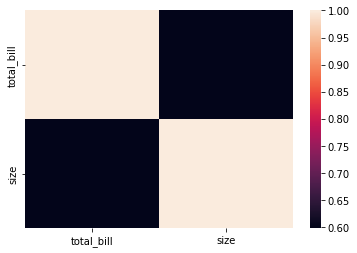

In [28]:
sns.heatmap(df[['total_bill','size']].corr(method = 'pearson'))

In [29]:
df[['total_bill','size']].corr(method = 'spearman')

,total_bill,size
total_bill,1.000000,0.604791
size,0.604791,1.000000


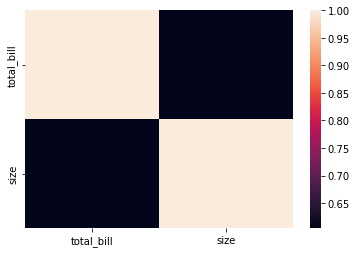

In [30]:
sns.heatmap(df[['total_bill','size']].corr(method = 'spearman'))

# The feature "total_bill" is moderately positive correlated